In [71]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import plotly.graph_objects as go
import math
from scipy.stats import kstest
import plotly.figure_factory as ff
import warnings
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
pip install ucimlrepo

**Данные**

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [ ]:
wine.data.original

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [ ]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [ ]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
wine.data.original.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893,1.938
std,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907,0.775
min,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000,1.000
25%,12.362,1.603,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500,1.000
50%,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500,2.000
75%,13.678,3.083,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000,3.000
max,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000,3.000


Text(0.5, 1.0, 'Распределение вин по сортам')

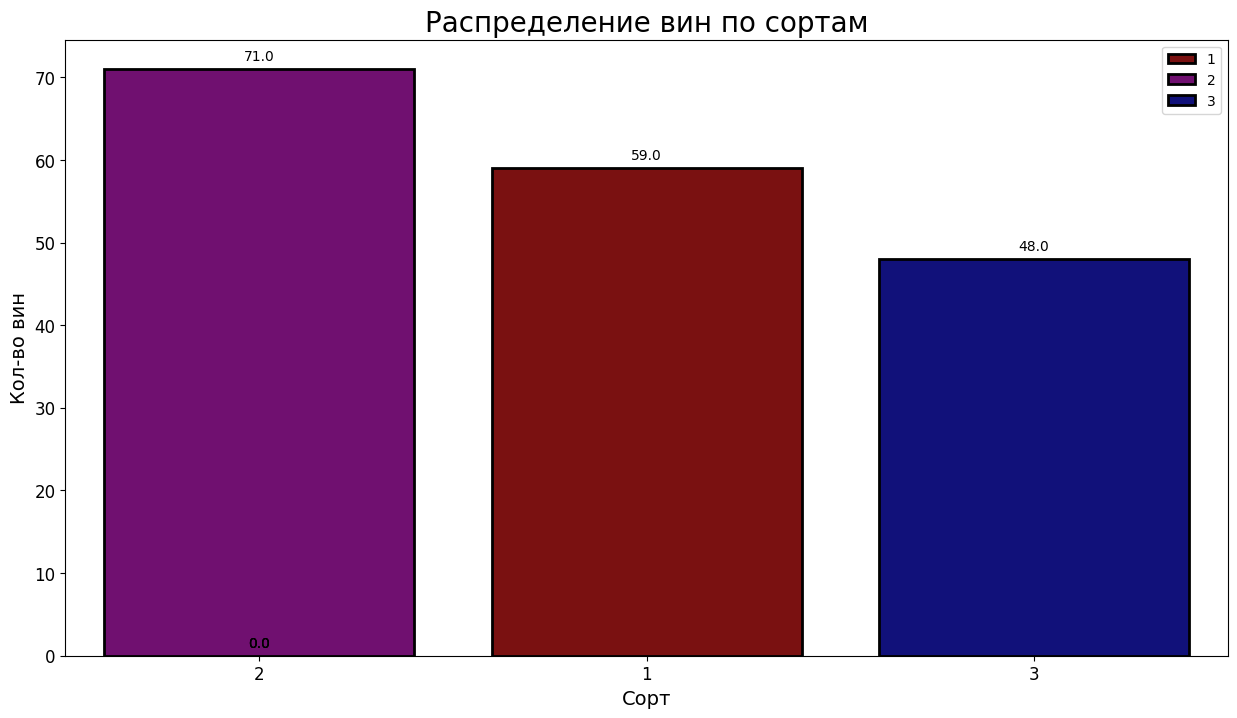

In [ ]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=wine.data.original, x='class',
                      hue='class',
                      order=wine.data.original['class'].value_counts().index,
                      palette=['darkred', 'purple', 'darkblue'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)


for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['1', '2', '3'], loc='upper right')
plt.ylabel('Кол-во вин', fontsize=14)
plt.xlabel('Сорт', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Распределение вин по сортам', fontsize=20)

**Распределение**

In [ ]:
kstest(X['Proline'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=278, statistic_sign=-1)

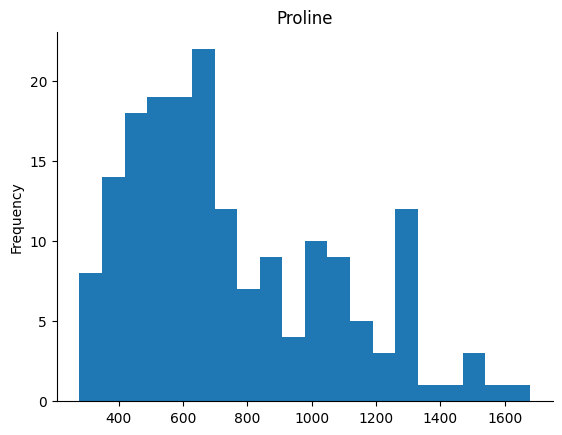

In [ ]:
X['Proline'].plot(kind='hist', bins=20, title='Proline')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
kstest(X['0D280_0D315_of_diluted_wines'], 'norm')

KstestResult(statistic=0.8979576849251809, pvalue=7.8289971663547145e-177, statistic_location=1.27, statistic_sign=-1)

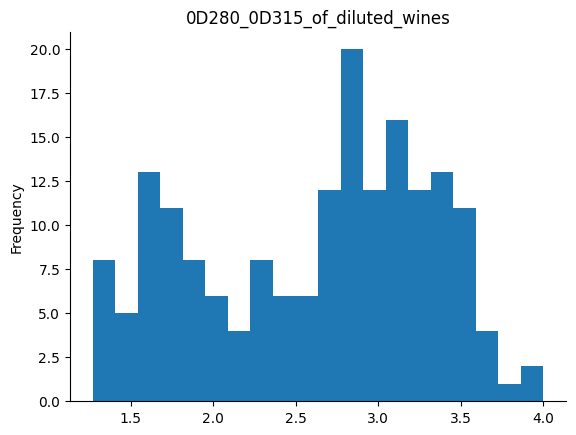

In [ ]:
from matplotlib import pyplot as plt
X['0D280_0D315_of_diluted_wines'].plot(kind='hist', bins=20, title='0D280_0D315_of_diluted_wines')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
kstest(X['Hue'], 'norm')

KstestResult(statistic=0.6997835062562121, pvalue=6.957509416669647e-88, statistic_location=0.54, statistic_sign=-1)

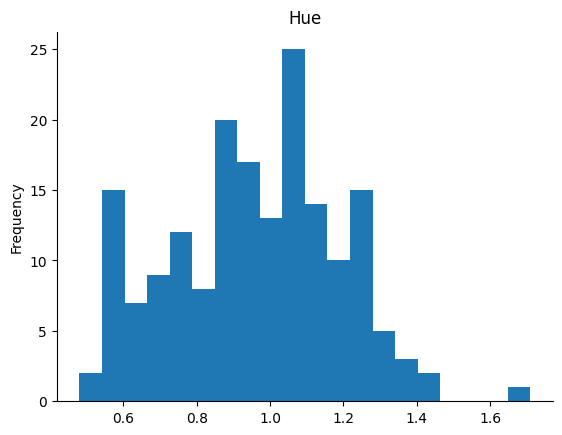

In [ ]:
from matplotlib import pyplot as plt
X['Hue'].plot(kind='hist', bins=20, title='Hue')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
kstest(X['Color_intensity'], 'norm')

KstestResult(statistic=0.9600474851278183, pvalue=2.3762038081566107e-249, statistic_location=1.9, statistic_sign=-1)

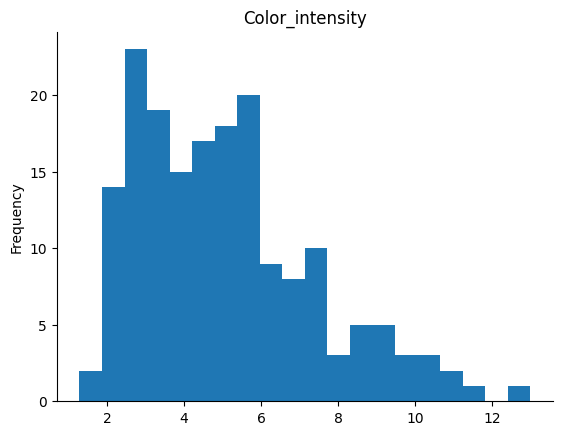

In [ ]:
from matplotlib import pyplot as plt
X['Color_intensity'].plot(kind='hist', bins=20, title='Color_intensity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
kstest(X['Proanthocyanins'], 'norm')

KstestResult(statistic=0.7263468486076146, pvalue=3.8542663382737e-96, statistic_location=0.8, statistic_sign=-1)

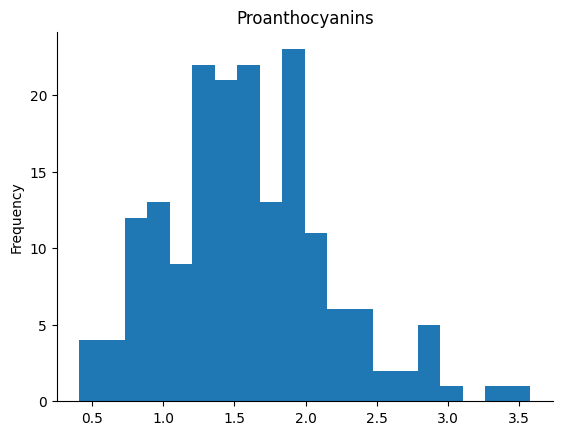

In [ ]:
from matplotlib import pyplot as plt
X['Proanthocyanins'].plot(kind='hist', bins=20, title='Proanthocyanins')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
kstest(X['Nonflavanoid_phenols'], 'norm')

KstestResult(statistic=0.5517167866545611, pvalue=1.9423391745250146e-51, statistic_location=0.13, statistic_sign=-1)

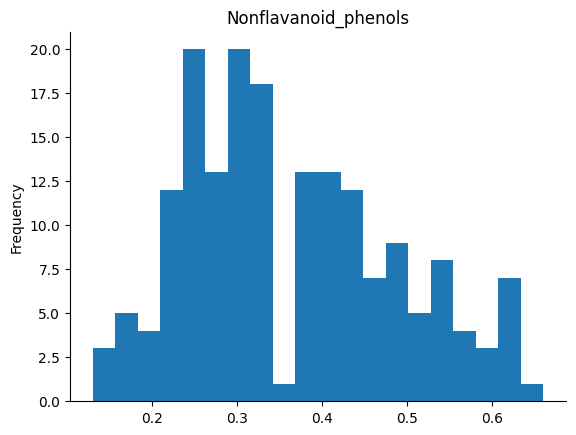

In [ ]:
from matplotlib import pyplot as plt
X['Nonflavanoid_phenols'].plot(kind='hist', bins=20, title='Nonflavanoid_phenols')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
kstest(X['Flavanoids'], 'norm')

KstestResult(statistic=0.6752045136893543, pvalue=8.643713578290511e-81, statistic_location=0.47, statistic_sign=-1)

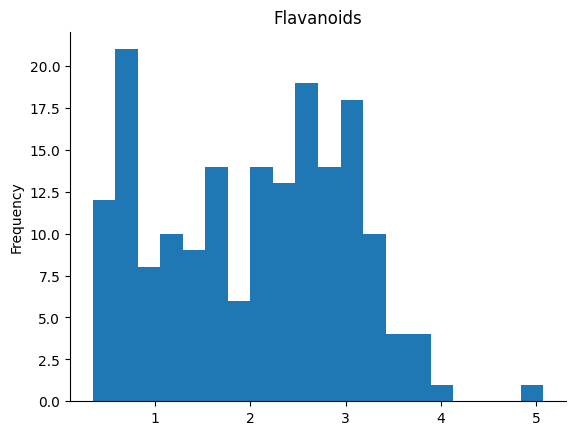

In [ ]:
from matplotlib import pyplot as plt
X['Flavanoids'].plot(kind='hist', bins=20, title='Flavanoids')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
kstest(X['Total_phenols'], 'norm')

KstestResult(statistic=0.8777841433940587, pvalue=8.681887443863243e-163, statistic_location=1.35, statistic_sign=-1)

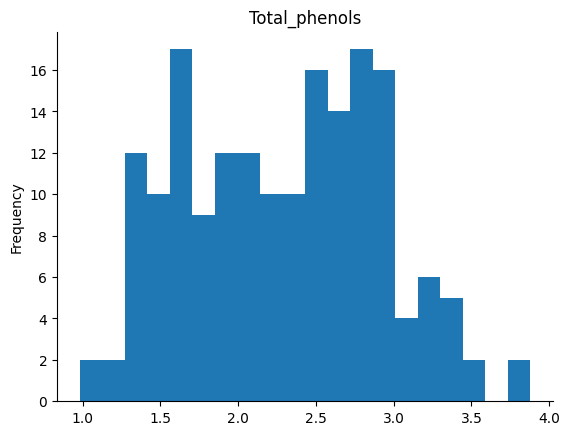

In [ ]:
from matplotlib import pyplot as plt
X['Total_phenols'].plot(kind='hist', bins=20, title='Total_phenols')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
kstest(X['Magnesium'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=70, statistic_sign=-1)

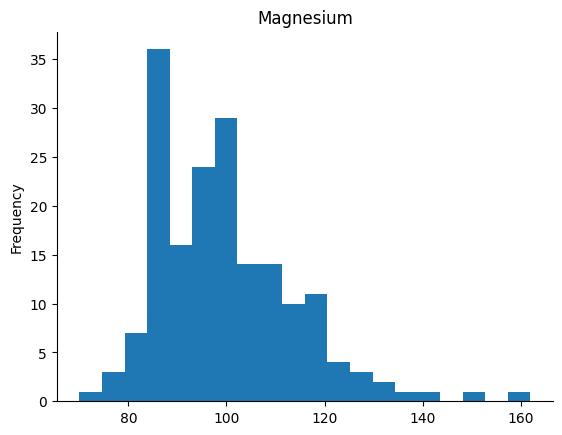

In [ ]:
X['Magnesium'].plot(kind='hist', bins=20, title='Magnesium')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
kstest(X['Alcalinity_of_ash'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=10.6, statistic_sign=-1)

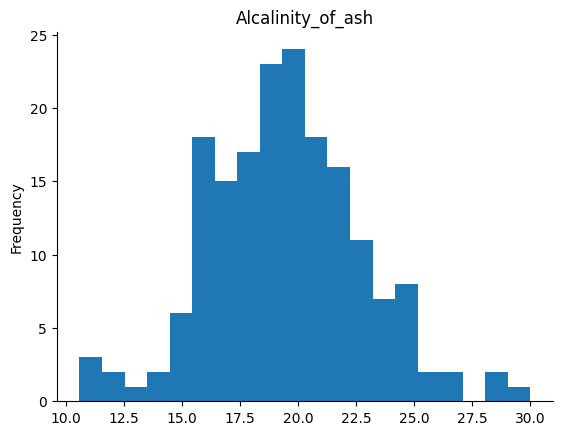

In [ ]:
# @title Alcalinity_of_ash

X['Alcalinity_of_ash'].plot(kind='hist', bins=20, title='Alcalinity_of_ash')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
kstest(X['Ash'], 'norm')

KstestResult(statistic=0.9498165597133671, pvalue=1.0018155238058482e-231, statistic_location=1.7, statistic_sign=-1)

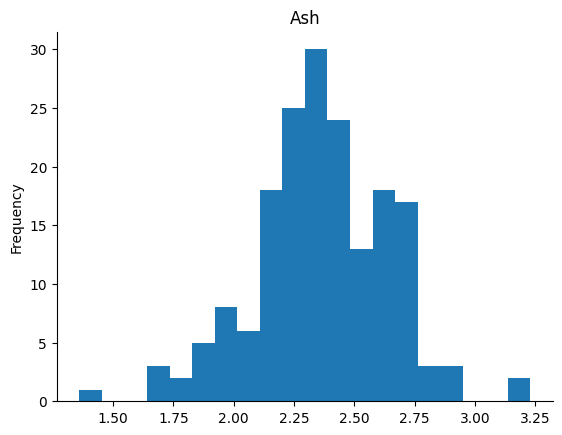

In [ ]:
# @title Ash

X['Ash'].plot(kind='hist', bins=20, title='Ash')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
kstest(X['Malicacid'], 'norm')

KstestResult(statistic=0.8076490794347374, pvalue=2.1960240394690426e-126, statistic_location=0.89, statistic_sign=-1)

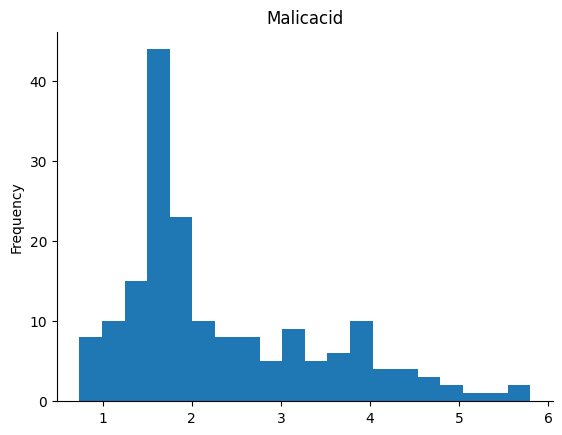

In [ ]:
# @title Malicacid

X['Malicacid'].plot(kind='hist', bins=20, title='Malicacid')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
kstest(X['Alcohol'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=11.03, statistic_sign=-1)

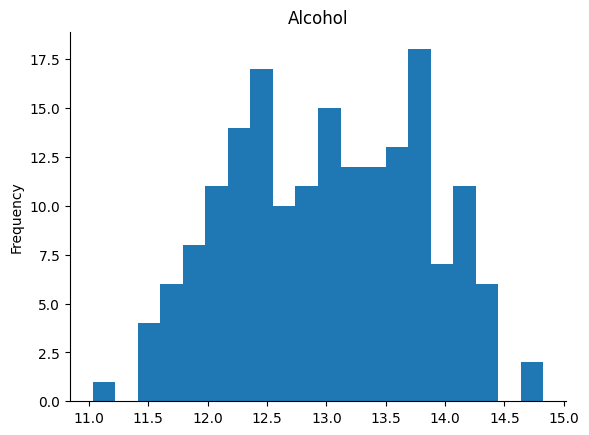

In [ ]:
# @title Alcohol

X['Alcohol'].plot(kind='hist', bins=20, title='Alcohol')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Корреляция**

In [ ]:
X.corr()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malicacid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<Axes: >

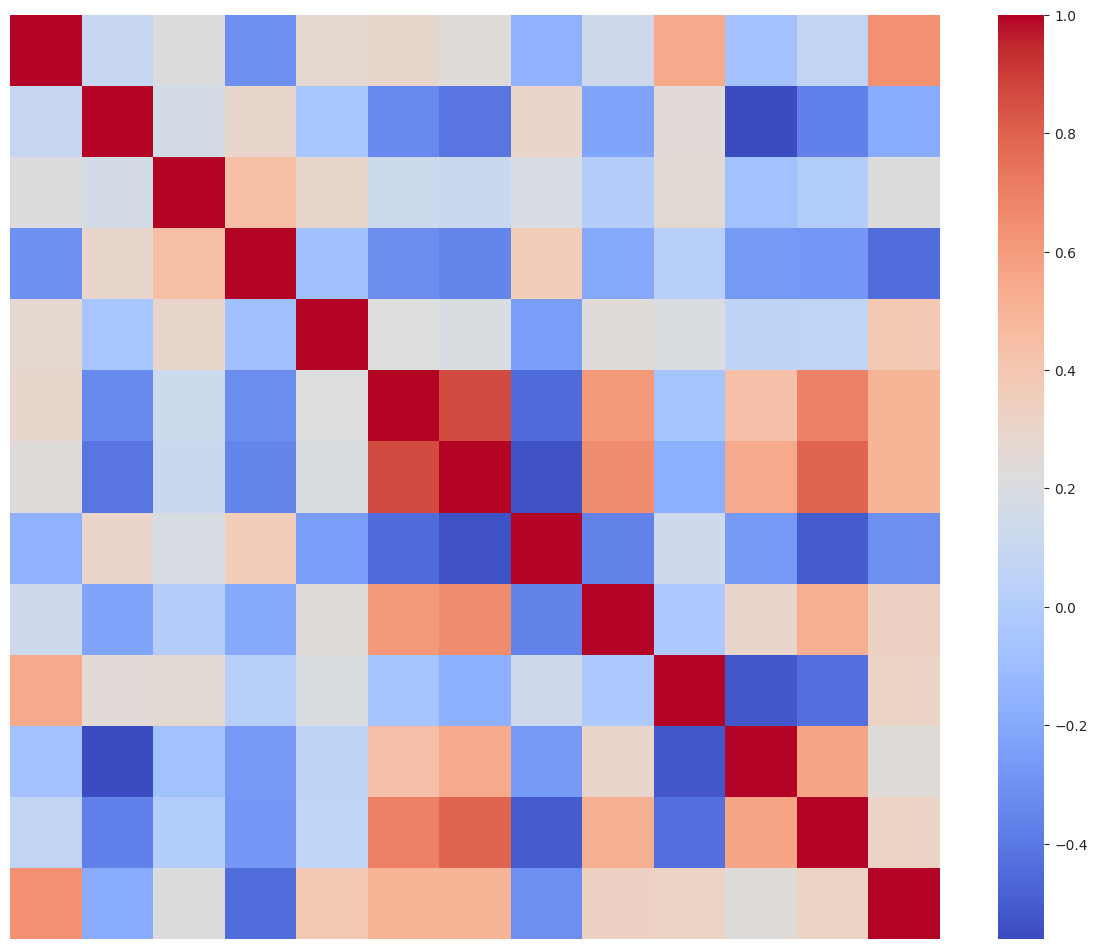

In [ ]:
sns.set_style('whitegrid')
correlation_matrix = X.corr()
plt.figure(figsize = (15,12))
sns.heatmap(correlation_matrix, xticklabels = False, yticklabels = False, cmap = 'coolwarm')

# **Разделение данных на test и train**

In [5]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=13)
trainX.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
17,13.83,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130
162,12.85,3.27,2.58,22.0,106,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570
101,12.60,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562
134,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495


# **decision tree**

In [58]:
train_x=trainX[['Total_phenols', 'Flavanoids']].copy()
test_x=testX[['Total_phenols', 'Flavanoids']].copy()

In [59]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(train_x, trainY)
predictions = model.predict(test_x)
predictions

array([3, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2, 3, 2, 2, 1, 1, 3, 2, 1,
       1, 2, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1])

In [48]:
f1_score(testY, predictions, average=None)

array([0.8       , 0.66666667, 0.57142857])

In [46]:
f1_score(testY, predictions, average='weighted')

0.6873015873015873

In [47]:
accuracy_score(testY, predictions)

0.6944444444444444

In [49]:
precision_score(testY, predictions, average=None)

array([0.76923077, 0.61111111, 0.8       ])

In [45]:
precision_score(testY, predictions, average='weighted')

0.711039886039886

In [50]:
recall_score(testY, predictions, average=None)

array([0.83333333, 0.73333333, 0.44444444])

In [44]:
recall_score(testY, predictions, average='weighted')

0.6944444444444444

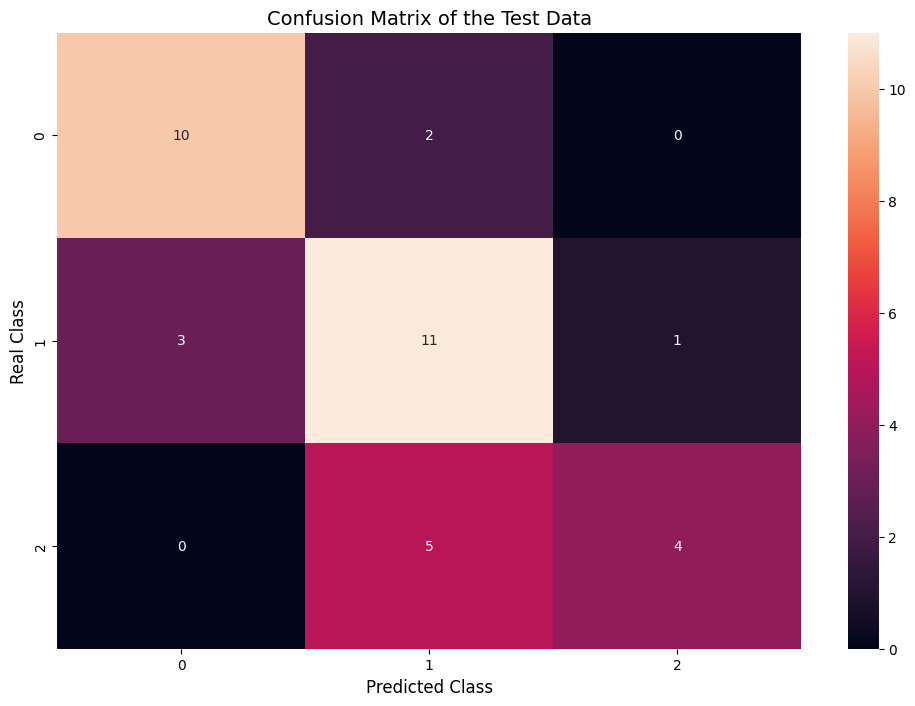

In [60]:
predictions = pd.DataFrame(model.predict(test_x))
plt.figure(figsize=(12, 8))
conf_mat = confusion_matrix(y_true=testY['class'], y_pred=predictions[0])
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

In [62]:
train_xn=trainX[['Ash', '0D280_0D315_of_diluted_wines']].copy()
test_xn=testX[['Ash', '0D280_0D315_of_diluted_wines']].copy()

In [63]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(train_xn, trainY)
predn = model.predict(test_xn)
predn

array([3, 1, 3, 2, 2, 1, 3, 1, 1, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 3, 3, 2,
       2, 1, 3, 1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 2])

In [41]:
f1_score(testY, predn, average=None)

array([0.71428571, 0.61538462, 0.88888889])

In [43]:
f1_score(testY, predn, average='weighted')

0.7167277167277167

In [51]:
accuracy_score(testY, predn)

0.7222222222222222

In [40]:
precision_score(testY, predn, average=None)

array([0.625     , 0.72727273, 0.88888889])

In [42]:
precision_score(testY, predn, average='weighted')

0.7335858585858586

In [38]:
recall_score(testY, predn, average=None)

array([0.83333333, 0.53333333, 0.88888889])

In [39]:
recall_score(testY, predn, average='weighted')

0.7222222222222222

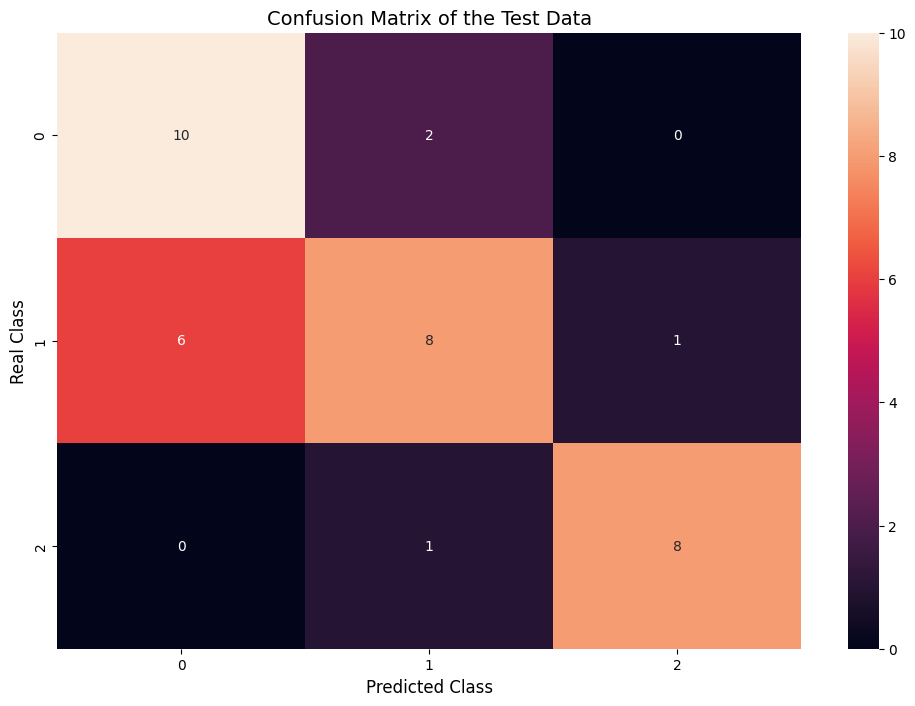

In [64]:
predn = pd.DataFrame(model.predict(test_xn))
plt.figure(figsize=(12, 8))
conf_mat = confusion_matrix(y_true=testY['class'], y_pred=predn[0])
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

# **RandomForest**

In [52]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(trainX, trainY)

train_scoreRF = rf.score(trainX, trainY)
oob_score = rf.oob_score_
Adjusted_R2_trainRF = 1 - (1 - rf.score(trainX, trainY)) * (len(trainY) - 1) / (len(trainY) - trainX.shape[1] - 1)
Adjusted_R2_testRF = 1 - (1 - rf.score(testX, testY)) * (len(testY) - 1) / (len(testY) - testX.shape[1] - 1)

print('Train Adjusted R2:', Adjusted_R2_trainRF * 100, '%')
print('Test Adjusted R2:', Adjusted_R2_testRF * 100, '%')
print('OOB Score:', oob_score * 100, '%')
rf.feature_importances_

Train Adjusted R2: 100.0 %
Test Adjusted R2: 100.0 %
OOB Score: 97.88732394366197 %


array([0.13855298, 0.03911637, 0.01694584, 0.02304668, 0.02988951,
       0.05504377, 0.19228107, 0.01570274, 0.03008634, 0.11810149,
       0.08583684, 0.08944898, 0.16594738])

In [68]:
f1_score(testY, rf.predict(testX), average='weighted')

1.0

In [65]:
accuracy_score(testY, rf.predict(testX))

1.0

In [69]:
precision_score(testY, rf.predict(testX), average='weighted')

1.0

In [70]:
recall_score(testY, rf.predict(testX), average='weighted')

1.0

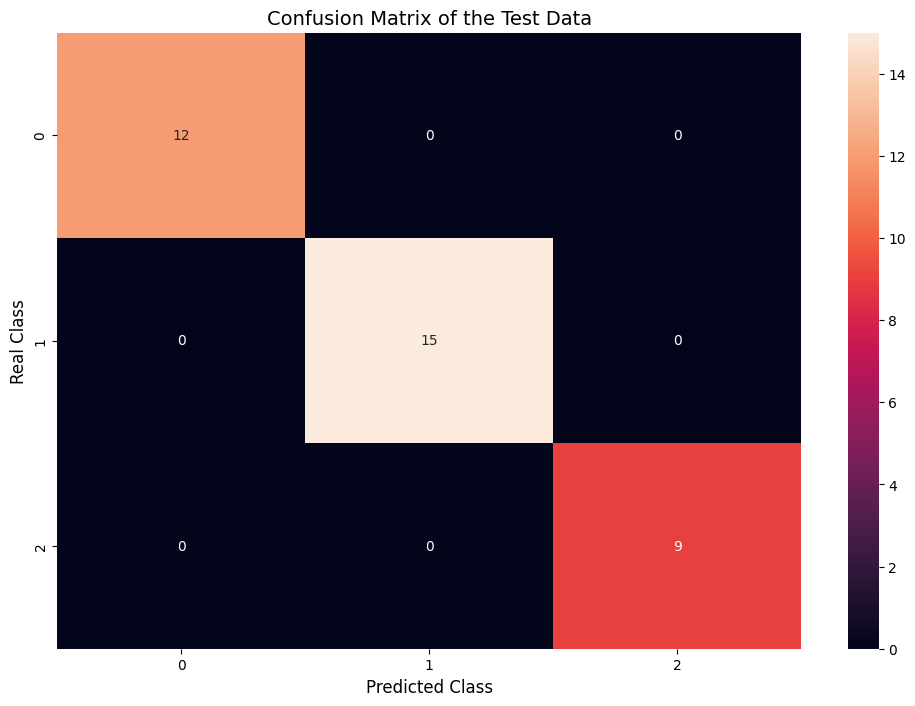

In [16]:
predictions_rf = pd.DataFrame(rf.predict(testX))
plt.figure(figsize=(12, 8))
conf_mat = confusion_matrix(y_true=testY['class'], y_pred=predictions_rf[0])
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

# **roc curve**

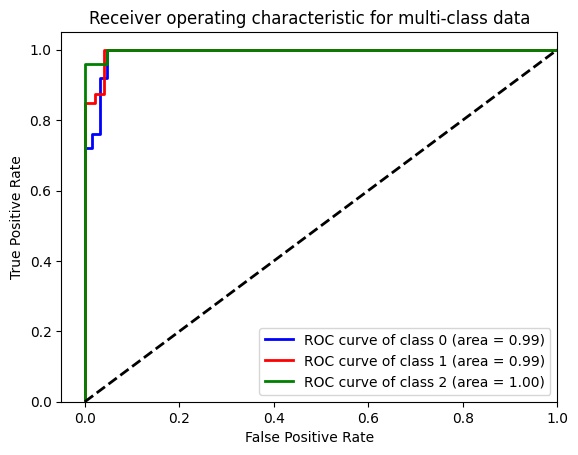

In [15]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()